# [Word Embedding Techniques](https://dataaspirant.com/word-embedding-techniques-nlp/#t-1597685144197)

1. [Data Fetch & Preprocessing](#data-fetch)
    1. [Word Tokenization](#word-tokenization)
1. [Word Embedding](#word-embedding)
    1. [Bag-of-words](#bag-of-words)
    1. [TF-IDF](#tf-idf)
    1. [Word2Vec (CBOW)](#word2vec-cbow)
    1. [Word2Vec (Skip-Gram)](#word2vec-skip-gram)


In [1]:
# COMMON LIBS
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# COMMON FUNCTIONS
def print2DT(table, title=None):
    """
    Pretty print for a 2D array.
    """

    print(f'==> { title if title else "table"}: [')
    for par in table:
        print(f'\t{par}')
    print(']')

## Data Fetch & Preprocessing

In [2]:
# LOADING DATA FROM THE COUNT MONTE CRISTO BOOK
with open('../res/CMC.txt', 'r', encoding='utf-8') as f:
    corpus = f.read()

corpus = corpus.split(
    "*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[1].split(
    "*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[0]

corpus = corpus.split('\n\n')
corpus = [ par.strip() for par in corpus ]

### Word Tokenization

In [3]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Remove punctuation
def proc_punctuations(text):
    words_bin = ['«', '»', '-', '\'']
    for w in words_bin:
        text = text.replace(w, ' ')

    return text.translate(str.maketrans('', '', string.punctuation))

def proc_spacing(text):
    return re.sub(r"\s+", " ", text)

# Tokenization
def proc_tokenisation(text):
    return nltk.word_tokenize(text)

# Stopwords
def proc_stopwords(tokens):
    stop_words = set(stopwords.words('french'))
    return [ w for w in tokens if not w in stop_words ]

# Stemming
def proc_stemming(words):
    stemmer = PorterStemmer()
    return [ stemmer.stem(word) for word in words ]

def proc_doc(doc):
    processed = doc.lower()
    processed = proc_punctuations(processed)
    processed = proc_spacing(processed)
    processed = proc_tokenisation(processed)
    processed = proc_stopwords(processed)
    return proc_stemming(processed)

# From text to tokens
def proc_corpus2tokens(corpus):
    builder = []
    for doc in corpus:
        if doc:
            processed = proc_doc(doc)
            builder.append(' '.join(processed))
        
    return builder

corpus = proc_corpus2tokens(corpus)
print(f'==> len(corpus): {len(corpus)}')
print2DT(corpus[:7], title='corpus[:7]')

==> len(corpus): 4201
==> corpus[:7]: [
	comt mont cristo
	alexandr duma
	tome i 1845 1846
	tabl matièr
	alexandr duma i marseil arrivé ii père fil iii catalan iv complot v repa fiançail vi substitut procureur roi vii interrogatoir viii château if ix soir fiançail x petit cabinet tuileri xi ogr cors xii père fil xiii cent jour xiv prisonni furieux prisonni fou xv numéro 34 numéro 27 xvi savant italien xvii chambr abbé xviii trésor xix troisièm accè xx cimetièr château if xxi île tiboulen xxii contrebandi xxiii île mont cristo xxiv éblouissement xxv inconnu xxvi auberg pont gard xxvii récit xxviii registr prison xxix maison morrel xxx cinq septembr xxxi itali simbad marin
	i
	marseil arrivé
]


## Word Embedding

### Bag-of-words

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

vocab = vectorizer.vocabulary_
df = pd.DataFrame(data=X.toarray(), columns=sorted(vocab.keys()))

print(f'==> X.shape: {X.toarray().shape}')
print(f'==> len(vocab): {len(vocab)}')
print('==> X.todense():')
df.head()

==> X.shape: (4201, 8765)
==> len(vocab): 8765
==> X.todense():


,10,12,13,149,1498,15,1796,18,1806,1807,...,événement,évêque,être,île,îlot,ôta,ôtait,ôte,ôter,ôté
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


### TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

vocab = vectorizer.get_feature_names_out()
df = pd.DataFrame(data=X.toarray(), columns=sorted(vocab))

print(f'==> X.shape: {X.shape}')
print(f'==> len(vocab): {len(vocab)}')
print('==> X.todense():')
df.head()

==> X.shape: (4201, 8765)
==> len(vocab): 8765
==> X.todense():


,10,12,13,149,1498,15,1796,18,1806,1807,...,événement,évêque,être,île,îlot,ôta,ôtait,ôte,ôter,ôté
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.133388,0.0,0.0,0.0,0.0,0.0,0.0


### Word2Vec (CBOW)

In [6]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# BUILDING Word2Vec (CBOW) MODEL
vectorizer = Word2Vec(
    sentences = [ doc.split(' ') for doc in corpus ],
    window    = 5,
    min_count = 2,
    workers   = 1,
    sg        = 0
)

vocab = vectorizer.wv
vocab_list = sorted([word for word in vocab.key_to_index.keys()])

print(f'==> len(vocab): {len(vocab)}')
print(f'==> vocab_list[:15]: {vocab_list[:15]}')
print(f'==> index_of("parlé"): {vocab.key_to_index['parlé']}')
print(f'==> key_of(2): "{vocab.index_to_key[2]}"')

==> len(vocab): 4876
==> vocab_list[:15]: ['', '10', '13', '1498', '15', '1807', '1811', '1814', '1815', '1816', '1er', '20', '24', '25', '27']
==> index_of("parlé"): 636
==> key_of(2): "tout"


In [7]:
print(vocab['parlé'].shape)
print(vocab['parlé'])

(100,)
[-0.05482381  0.09152642  0.03394065  0.02519394  0.05609752 -0.25417507
  0.08244976  0.22695516 -0.09511357 -0.05785726  0.03280456 -0.15579355
 -0.00190071  0.02463996  0.00497938 -0.05981381  0.03356754 -0.0744637
 -0.02295569 -0.2234824   0.0587737   0.014912    0.11065864 -0.05689391
  0.02467147 -0.00834063 -0.13144039 -0.0329156  -0.14253096 -0.06620792
  0.1309214   0.01265914  0.08113715 -0.106121   -0.07382993  0.08785814
 -0.01277039 -0.08541936 -0.01490545 -0.20749907  0.01716065 -0.10157976
 -0.00026448  0.00092033  0.07821385 -0.06660843 -0.16720338 -0.02073481
  0.07556189  0.08162187  0.0620866  -0.09829181 -0.0398997   0.01088121
 -0.08497067  0.05338421  0.07308523 -0.00520456 -0.09255704  0.02572685
  0.02851023  0.03306456 -0.0226503   0.01395965 -0.12804249  0.12799993
 -0.00297461  0.12530059 -0.16145146  0.07264781 -0.10952318  0.0789291
  0.11060087 -0.03199708  0.1042777   0.04647787 -0.02710348 -0.01534312
 -0.13754104 -0.00949164 -0.08504988 -0.008524

In [17]:
# PREDICTING WORD FROM CONTEXT
def w2v_predict_word(context, vocab, topn=5):
    context = proc_doc(context)
    print(f'==> prediction: {vocab.most_similar(positive=context, topn=topn)}')

w2v_predict_word(context='nous a fait perdre un jour et demi', vocab=vocab)

==> prediction: [('croir', 0.9986854195594788), ('arrêté', 0.9986783862113953), ('preuv', 0.9986772537231445), ('sort', 0.9986737966537476), ('longtemp', 0.9986423254013062)]


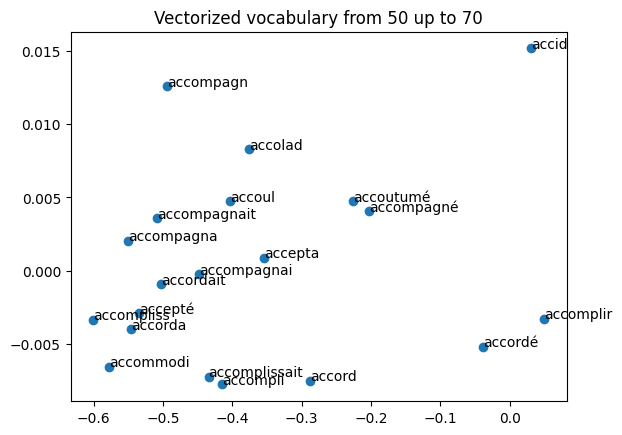

In [9]:
# PLOT VECTORIZED VOCABULARY SPACE
svd = 50  # start vocabulary display
mvd = 20  # maximum vocabulary display

X = vocab.__getitem__(vocab_list)
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[svd:svd+mvd,0], result[svd:svd+mvd,1])
for i, word in enumerate(vocab_list[svd:svd+mvd]):
    plt.annotate(text=word, xy=(result[svd+i,0], result[svd+i,1]))
plt.title(f'Vectorized vocabulary from {svd} up to {svd+mvd}')
plt.show()

### Word2Vec (Skip-Gram)

In [10]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# BUILDING Word2Vec (Skip-Gram) MODEL
vectorizer = Word2Vec(
    sentences = [ doc.split(' ') for doc in corpus ],
    window    = 2,
    min_count = 2,
    workers   = 1,
    sg        = 1
)

vocab = vectorizer.wv
vocab_list = sorted([word for word in vocab.key_to_index.keys()])

print(f'==> len(vocab): {len(vocab)}')
print(f'==> vocab_list[:15]: {vocab_list[:15]}')

==> len(vocab): 4876
==> vocab_list[:15]: ['', '10', '13', '1498', '15', '1807', '1811', '1814', '1815', '1816', '1er', '20', '24', '25', '27']


In [29]:
print(vocab.most_similar(negative=['bien']))

[('', 0.025624124333262444), ('frémit', -0.6782318949699402), ('mène', -0.7099460959434509), ('continuon', -0.7405833005905151), ('mill', -0.7429097890853882), ('xxx', -0.7440593242645264), ('faisiez', -0.7449479103088379), ('cent', -0.7478203177452087), ('peu', -0.7491774559020996), ('payez', -0.7544300556182861)]


In [12]:
# OBTAINING CONTEXT FROM WORD
def w2v_predict_context(word, vocab, topn=5):
    word = proc_doc(word)
    print(vocab.most_similar(positive=word, topn=topn))

w2v_predict_context('deux', vocab)

[('troi', 0.9957102537155151), ('quatr', 0.9950019121170044), ('cinq', 0.9944425225257874), ('moi', 0.9944232702255249), ('an', 0.9942100644111633)]


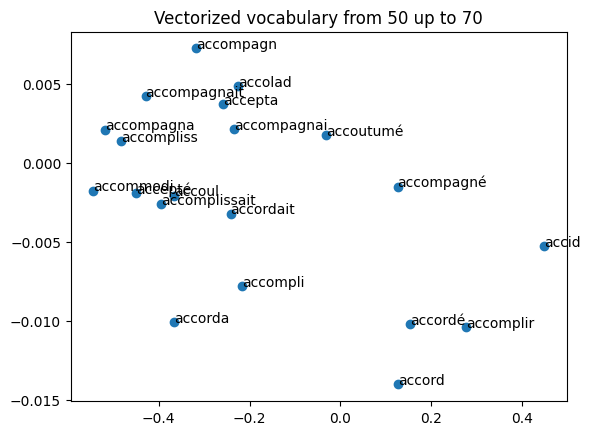

In [13]:
# PLOT VECTORIZED VOCABULARY SPACE
svd = 50  # start vocabulary display
mvd = 20  # maximum vocabulary display

X = vocab.__getitem__(vocab_list)
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[svd:svd+mvd,0], result[svd:svd+mvd,1])
for i, word in enumerate(vocab_list[svd:svd+mvd]):
    plt.annotate(text=word, xy=(result[svd+i,0], result[svd+i,1]))
plt.title(f'Vectorized vocabulary from {svd} up to {svd+mvd}')
plt.show()

# /TESTS/